In [1]:
import pandas as pd
import numpy as np
import json
import wget
import math
import os
import gzip
import util
import matplotlib.pyplot as plt

In [2]:
first_year = 1990
last_year = 2020

In [3]:
# Unzip gz archieve
def gunzip(source_filepath, dest_filepath, block_size=65536):
    with gzip.open(source_filepath, 'rb') as s_file, \
            open(dest_filepath, 'wb') as d_file:
        while True:
            block = s_file.read(block_size)
            if not block:
                break
            else:
                d_file.write(block)

In [3]:
# Download acl anthology
if not os.path.exists("data/anthology.bib.gz"):
    filename = wget.download("https://www.aclweb.org/anthology/anthology.bib.gz", out="data/")

# Extract anthology
if not os.path.exists("data/anthology.bib"):
    gunzip("data/anthology.bib.gz", "data/anthology.bib")

In [4]:
# Load bibtex acl into dataframe
import bibtexparser
from bibtexparser.bparser import BibTexParser

parser = BibTexParser(common_strings=True)
parser.ignore_nonstandard_types = False
parser.homogenise_fields = False
parser.customization = bibtexparser.customization.convert_to_unicode

with open("data/anthology.bib") as bibtex_file:
    bib_database = bibtexparser.load(bibtex_file, parser)
df = pd.DataFrame(bib_database.entries)

In [5]:
df

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,volume,journal,doi,isbn,language,number,note
0,https://www.aclweb.org/anthology/2021.wassa-1.0,Association for Computational Linguistics,Online,2021,April,"De Clercq, Orphee and\nBalahur, Alexandra an...",Proceedings of the Eleventh Workshop on Comput...,proceedings,wassa-2021-approaches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.aclweb.org/anthology/2021.wassa-1.1,Association for Computational Linguistics,Online,2021,April,NaN,ToxCCIn: Toxic Content Classification with Int...,inproceedings,xiang-etal-2021-toxccin,1--12,Proceedings of the Eleventh Workshop on Comput...,"Xiang, Tong and\nMacAvaney, Sean and\nYang, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.aclweb.org/anthology/2021.wassa-1.2,Association for Computational Linguistics,Online,2021,April,NaN,Language that Captivates the Audience: Predict...,inproceedings,kerz-etal-2021-language,13--24,Proceedings of the Eleventh Workshop on Comput...,"Kerz, Elma and\nQiao, Yu and\nWiechmann, Daniel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.aclweb.org/anthology/2021.wassa-1.3,Association for Computational Linguistics,Online,2021,April,NaN,Partisanship and Fear are Associated with Resi...,inproceedings,lindow-etal-2021-partisanship,25--33,Proceedings of the Eleventh Workshop on Comput...,"Lindow, Mike and\nDeFranza, David and\nMishr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.aclweb.org/anthology/2021.wassa-1.4,Association for Computational Linguistics,Online,2021,April,NaN,Explainable Detection of Sarcasm in Social Media,inproceedings,akula-garibay-2021-explainable,34--39,Proceedings of the Eleventh Workshop on Comput...,"Akula, Ramya and\nGaribay, Ivan",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64539,https://www.aclweb.org/anthology/C65-1027,NaN,NaN,1965,NaN,NaN,Data Preparation for Syntactic Translation,inproceedings,tosh-1965-data,NaN,COLING 1965,"Tosh, L. W.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
64540,https://www.aclweb.org/anthology/C65-1028,NaN,NaN,1965,NaN,NaN,MORPHISM: A Symbolic List Processing Language,inproceedings,vandenburgh-1965-morphism,NaN,COLING 1965,"Vandenburgh, Harold R.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
64541,https://www.aclweb.org/anthology/C65-1029,NaN,NaN,1965,NaN,NaN,Syntactic Analysis in the Case of Highly Infle...,inproceedings,varga-1965-syntactic,NaN,COLING 1965,"Varga, D.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
64542,https://www.aclweb.org/anthology/C65-1030,NaN,NaN,1965,NaN,NaN,Syntaxe Et Interpretation,inproceedings,vauquois-etal-1965-syntaxe,NaN,COLING 1965,"Vauquois, B. and\nVeillon, G. and\nVeyrunes, J.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Store full anthology dataframe as csv file
df.to_csv("data/anthology.csv", sep="|", index=False)

In [2]:
# Load full anthology csv file into dataframe
df = pd.read_csv("data/anthology.csv", sep="|", keep_default_na=False)
df[-5:]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,volume,journal,doi,isbn,language,number,note
64539,https://www.aclweb.org/anthology/C65-1027,,,1965,,,Data Preparation for Syntactic Translation,inproceedings,tosh-1965-data,,COLING 1965,"Tosh, L. W.",,,,,,,
64540,https://www.aclweb.org/anthology/C65-1028,,,1965,,,MORPHISM: A Symbolic List Processing Language,inproceedings,vandenburgh-1965-morphism,,COLING 1965,"Vandenburgh, Harold R.",,,,,,,
64541,https://www.aclweb.org/anthology/C65-1029,,,1965,,,Syntactic Analysis in the Case of Highly Infle...,inproceedings,varga-1965-syntactic,,COLING 1965,"Varga, D.",,,,,,,
64542,https://www.aclweb.org/anthology/C65-1030,,,1965,,,Syntaxe Et Interpretation,inproceedings,vauquois-etal-1965-syntaxe,,COLING 1965,"Vauquois, B. and\nVeillon, G. and\nVeyrunes, J.",,,,,,,
64543,https://www.aclweb.org/anthology/C65-1031,,,1965,,,Automatic Deep Structure Analysis Using an App...,inproceedings,lieberman-etal-1965-automatic,,COLING 1965,"Lieberman, D. and\nLochak, D. and\nOchel, K.",,,,,,,


# Used Anthology IDs

## ACL
**XXXX.acl-main.X**  (e.g. 2020.acl-main.0: proceedings, 2020.acl-main.1: first inproceeding)  
**PXX-1XXX** (e.g. P19-1000: proceedings, P19-1001: first inproceeding)  

## EMNLP
**XXXX.emnlp-main.X**  (e.g. 2020.emnlp-main.0: proceedings, 2020.emnlp-main.1: first inproceeding)  
**DXX-1XXX** (e.g. D19-1000: proceedings, D19-1001: first inproceeding)  
**W06-16XX** (not used, only for year 2006)  
**H05-1XXX** (not used, only for year 2005)  
**W04-32XX** (not used, only for year 2004)  
**W03-1XXX** (not used, only for year 2003)  
**W02-1XXX** (not used, only for year 2002)  
**W01-05XX** (not used, only for year 2001)  
**W00-13XX** (not used, only for year 2000)  
**W99-06XX** (not used, only for year 1999)  
**W98-15XX** (not used, only for year 1998)  
**W97-03XX** (not used, only for year 1997)  
**W96-02XX** (not used, only for year 1996)  

## NAACL
**NXX-1XXX** (e.g. N19-1000: proceedings, N19-1001: first inproceeding)  
**A00-2XXX** (not used, only for year 2000)  

## COLING
**XXXX.coling-main.X**  (e.g. 2020.coling-main.0: proceedings, 2020.coling-main.1: first inproceeding)  
**CXX-1XXX** (e.g. D18-1000: proceedings, D18-1001: first inproceeding)  
**P06-1XXX** (included by ACL, only for year 2006)  
**C02-2XXX** (not used, only for year 2002, 17th Conference)  
**C00-2XXX** (not used, only for year 2000, Volume 2)  
**C9[0|2|4|8]-2XXX** (not used, only for year 2000, Volume 2)  
**C9[0|2]-3XXX** (not used, only for years 1990/1992, Volume 3)  
**C92-4XXX** (not used, only for year 1992, Volume 4)  

## CONLL
**XXXX.conll-1.X**  (e.g. 2020.conll-1.0: proceedings, 2020.conll-1.1: first inproceeding)  
**KXX-1XXX** (e.g. K19-1000: proceedings, K19-1001: first inproceeding)  
**W14-16XX** (not used, only for year 2014)  
**W13-35XX** (not used, only for year 2013)  
**D12-1XXX** (included by EMNLP, only for year 2012)  
**W11-03XX** (not used, only for year 2011)  
**W10-29XX** (not used, only for year 2010)  
**W09-11XX** (not used, only for year 2009)  
**W08-21XX** (not used, only for year 2008)  
**D07-1XXX** (included by EMNLP, only for year 2007)  
**W06-29XX** (not used, only for year 2006)  
**W05-06XX** (not used, only for year 2005)  
**W04-24XX** (not used, only for year 2004)  
**W03-04XX** (not used, only for year 2003)  
**W02-2XXX** (not used, only for year 2002)  
**W01-07XX** (not used, only for year 2001)  
**W00-07XX** (not used, only for year 2000)  
**W99-07XX** (not used, only for year 1999)  
**W98-12XX** (not used, only for year 1998)  
**W97-1XXX** (not used, only for year 1997)  

## TACL
**XXXX.tacl-1.X**  (e.g. 2020.conll-1.1: first inproceeding)  
**QXX-1XXX** (e.g. Q19-1000: first inproceeding)  

In [6]:
# only inproceedings and articles
df = df[df["ENTRYTYPE"] != "proceedings"]
# only inproceedings from year 1990 until 2020
df = df[df["year"].astype(int) >= first_year]
df = df[df["year"].astype(int) <= last_year]

In [7]:
# Split full anthology dataframe with respect to conferences
conf2df = util.split_to_conferences(df)

In [9]:
# Combine conference dataframes into one big dataframe
df_comb = pd.concat([conf2df["acl"], conf2df["emnlp"], conf2df["naacl"], conf2df["coling"], conf2df["conll"], conf2df["tacl"]])

In [10]:
# Check if fields wothout url exists
df_comb[df_comb["url"] == ""]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,volume,journal,doi,isbn,language,number,note


In [14]:
# Save combined dataframe, containing only entries of used conferences
df_comb.to_csv("data/anthology_conferences.csv", sep="|", index=False)

In [11]:
# Add pdf column
df_comb["pdf"] = ""

In [17]:
# Download pdfs
not_found = 0

for i, row in df_acl.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
             
for i, row in df_emnlp.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
    
for i, row in df_naacl.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
    
for i, row in df_coling.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
    
for i, row in df_conll.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
    
for i, row in df_tacl.iterrows():
    if not os.path.exists("data/pdfs/" + row["url"].split("/")[-1] + ".pdf"):
        try:
            wget.download(row["url"] + ".pdf", out="data/pdfs/")
            df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
        except:
            print("Could not download pdf", row["url"] + ".pdf")
            not_found += 1
    else:
        df_comb.at[i, "pdf"] = row["url"].split("/")[-1] + ".pdf"
    
df_comb[df_comb["author"] == ""]

Could not download pdf https://www.aclweb.org/anthology/N01-1022.pdf
Could not download pdf https://www.aclweb.org/anthology/2020.tacl-1.0.pdf
Could not download pdf https://www.aclweb.org/anthology/Q19-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q18-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q17-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q16-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q15-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q14-1000.pdf
Could not download pdf https://www.aclweb.org/anthology/Q13-1000.pdf


,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,volume,journal,doi,isbn,language,number,note,pdf
50503,https://www.aclweb.org/anthology/W04-3257,Association for Computational Linguistics,"Barcelona, Spain",2004,July,,Author Index,inproceedings,nn-2004-author-index,,Proceedings of the 2004 Conference on Empirica...,,,,,,,,,W04-3257.pdf
55315,https://www.aclweb.org/anthology/W00-1328,Association for Computational Linguistics,"Hong Kong, China",2000,October,,Author Index,inproceedings,nn-2000-author-index-3,,2000 Joint SIGDAT Conference on Empirical Meth...,,,,,,,,,W00-1328.pdf
56800,https://www.aclweb.org/anthology/W98-1513,Association for Computational Linguistics,"Palacio de Exposiciones y Congresos, Granada, ...",1998,June,,Author Index,inproceedings,nn-1998-author-index-2,,Proceedings of the Third Conference on Empiric...,,,,,,,,,W98-1513.pdf
58711,https://www.aclweb.org/anthology/C96-2214,,,1996,,,Author Index,inproceedings,nn-1996-author-index-3,,COLING 1996 Volume 2: The 16th International C...,,,,,,,,,C96-2214.pdf
60657,https://www.aclweb.org/anthology/C92-4217,,,1992,,,personal notes,inproceedings,nn-1992-personal-notes-3,,COLING 1992 Volume 4: The 14th International C...,,,,,,,,,C92-4217.pdf
60703,https://www.aclweb.org/anthology/C92-3169,,,1992,,,personal notes,inproceedings,nn-1992-personal-notes-2,,COLING 1992 Volume 3: The 14th International C...,,,,,,,,,C92-3169.pdf
60764,https://www.aclweb.org/anthology/C92-2124,,,1992,,,personal notes,inproceedings,nn-1992-personal-notes,,COLING 1992 Volume 2: The 14th International C...,,,,,,,,,C92-2124.pdf
60766,https://www.aclweb.org/anthology/C92-1001,,,1992,,,Prefaces et communications thematiques,inproceedings,nn-1992-prefaces,,COLING 1992 Volume 1: The 14th International C...,,,,,,,,,C92-1001.pdf
60771,https://www.aclweb.org/anthology/C92-1006,,,1992,,,Table of contents,inproceedings,nn-1992-table,,COLING 1992 Volume 1: The 14th International C...,,,,,,,,,C92-1006.pdf
60772,https://www.aclweb.org/anthology/C92-1007,,,1992,,,Author index,inproceedings,nn-1992-author-index,,COLING 1992 Volume 1: The 14th International C...,,,,,,,,,C92-1007.pdf


In [12]:
# Remove entries without authors
df_comb = df_comb[df_comb["author"] != ""]

In [13]:
# Show entries without pdf
df_comb[df_comb["pdf"] == ""]

,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,booktitle,author,volume,journal,doi,isbn,language,number,note,pdf
6763,https://www.aclweb.org/anthology/2020.acl-main.1,Association for Computational Linguistics,Online,2020,July,NaN,Learning to Understand Child-directed and Adul...,inproceedings,gelderloos-etal-2020-learning,1--6,Proceedings of the 58th Annual Meeting of the ...,"Gelderloos, Lieke and\nChrupała, Grzegorz an...",NaN,NaN,10.18653/v1/2020.acl-main.1,NaN,NaN,NaN,NaN,
6764,https://www.aclweb.org/anthology/2020.acl-main.2,Association for Computational Linguistics,Online,2020,July,NaN,Predicting Depression in Screening Interviews ...,inproceedings,rinaldi-etal-2020-predicting,7--18,Proceedings of the 58th Annual Meeting of the ...,"Rinaldi, Alex and\nFox Tree, Jean and\nChatu...",NaN,NaN,10.18653/v1/2020.acl-main.2,NaN,NaN,NaN,NaN,
6765,https://www.aclweb.org/anthology/2020.acl-main.3,Association for Computational Linguistics,Online,2020,July,NaN,Coach: A Coarse-to-Fine Approach for Cross-dom...,inproceedings,liu-etal-2020-coach,19--25,Proceedings of the 58th Annual Meeting of the ...,"Liu, Zihan and\nWinata, Genta Indra and\nXu,...",NaN,NaN,10.18653/v1/2020.acl-main.3,NaN,NaN,NaN,NaN,
6766,https://www.aclweb.org/anthology/2020.acl-main.4,Association for Computational Linguistics,Online,2020,July,NaN,Designing Precise and Robust Dialogue Response...,inproceedings,zhao-etal-2020-designing,26--33,Proceedings of the 58th Annual Meeting of the ...,"Zhao, Tianyu and\nLala, Divesh and\nKawahara...",NaN,NaN,10.18653/v1/2020.acl-main.4,NaN,NaN,NaN,NaN,
6767,https://www.aclweb.org/anthology/2020.acl-main.5,Association for Computational Linguistics,Online,2020,July,NaN,Dialogue State Tracking with Explicit Slot Con...,inproceedings,ouyang-etal-2020-dialogue,34--40,Proceedings of the 58th Annual Meeting of the ...,"Ouyang, Yawen and\nChen, Moxin and\nDai, Xin...",NaN,NaN,10.18653/v1/2020.acl-main.5,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32343,https://www.aclweb.org/anthology/Q13-1031,NaN,NaN,2013,NaN,NaN,Data-Driven Metaphor Recognition and Explanation,article,li-etal-2013-data,379--390,NaN,"Li, Hongsong and\nZhu, Kenny Q. and\nWang, H...",1,Transactions of the Association for Computatio...,10.1162/tacl_a_00235,NaN,NaN,NaN,NaN,
32344,https://www.aclweb.org/anthology/Q13-1032,NaN,NaN,2013,NaN,NaN,Powergrading: a Clustering Approach to Amplify...,article,basu-etal-2013-powergrading,391--402,NaN,"Basu, Sumit and\nJacobs, Chuck and\nVanderwe...",1,Transactions of the Association for Computatio...,10.1162/tacl_a_00236,NaN,NaN,NaN,NaN,
32345,https://www.aclweb.org/anthology/Q13-1033,NaN,NaN,2013,NaN,NaN,Training Deterministic Parsers with Non-Determ...,article,goldberg-nivre-2013-training,403--414,NaN,"Goldberg, Yoav and\nNivre, Joakim",1,Transactions of the Association for Computatio...,10.1162/tacl_a_00237,NaN,NaN,NaN,NaN,
32346,https://www.aclweb.org/anthology/Q13-1034,NaN,NaN,2013,NaN,NaN,Joint Morphological and Syntactic Analysis for...,article,bohnet-etal-2013-joint,415--428,NaN,"Bohnet, Bernd and\nNivre, Joakim and\nBogusl...",1,Transactions of the Association for Computatio...,10.1162/tacl_a_00238,NaN,NaN,NaN,NaN,


In [32]:
# Store anthology dataframe with pdf link as csv file
df_comb.to_csv("data/anthology_conferences.csv", sep="|", index=False)

In the following we need the with [science-parse](https://github.com/allenai/science-parse) parsed pdf files in data/json/

In [28]:
# Add abstracts to dataframe
df_comb['abstract'] = ""
for i, row in df_comb.iterrows():
    if row["pdf"] == "":
        continue
    pdf = row["pdf"]
    try:
        with open("data/json/" + pdf + ".json") as jf:
            paper = json.load(jf)
        df_comb.at[i, "abstract"] = paper["metadata"]["abstractText"]
    except FileNotFoundError:
        print("File not found:", "data/json/" + pdf + ".json")
df_comb[:2]

File not found: data/json/2020.emnlp-main.218.pdf.json
File not found: data/json/D19-1668.pdf.json
File not found: data/json/2020.coling-main.114.pdf.json
File not found: data/json/2020.coling-main.378.pdf.json


,url,publisher,address,year,month,editor,title,ENTRYTYPE,ID,pages,...,author,volume,journal,doi,isbn,language,number,note,pdf,abstract
6763,https://www.aclweb.org/anthology/2020.acl-main.1,Association for Computational Linguistics,Online,2020,July,,Learning to Understand Child-directed and Adul...,inproceedings,gelderloos-etal-2020-learning,1--6,...,"Gelderloos, Lieke and\nChrupała, Grzegorz an...",,,10.18653/v1/2020.acl-main.1,,,,,2020.acl-main.1.pdf,Speech directed to children differs from adult...
6764,https://www.aclweb.org/anthology/2020.acl-main.2,Association for Computational Linguistics,Online,2020,July,,Predicting Depression in Screening Interviews ...,inproceedings,rinaldi-etal-2020-predicting,7--18,...,"Rinaldi, Alex and\nFox Tree, Jean and\nChatu...",,,10.18653/v1/2020.acl-main.2,,,,,2020.acl-main.2.pdf,Despite the pervasiveness of clinical depressi...


In [14]:
# Validate if all pdfs are available
print("Number of entries in dataframe:", len(df_comb))
print("Number of entries with a pdf:", len(df_comb[df_comb["pdf"] != ""]))

Number of entries in dataframe: 15730
Number of entries with a pdf: 0


In [2]:
# Store anthology dataframe with abstracts
df_comb.to_csv("data/anthology_conferences.csv", sep="|", index=False)

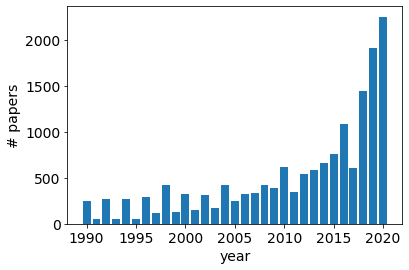

In [16]:
# Count documents for each year
import matplotlib

params = {'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

years = [x for x in range(first_year, last_year+1)]

counts = [0 for x in years]

for i, row in df_comb.iterrows():
    year = row["year"]
    counts[int(year)-first_year] += 1

plt.bar(years, counts)
plt.xlabel("year", fontsize=14)
plt.ylabel("# papers", fontsize=14)
plt.show()

In [4]:
# Remove unused pdf and json files 
used_pdfs = list(df_comb["pdf"])

for pdf in os.listdir("data/pdfs/"):
    if pdf not in used_pdfs:
        print(pdf)
        os.remove("data/pdfs/" + pdf) 
        
for jf in os.listdir("data/json/"):
    if jf.replace(".json", "") not in used_pdfs:
        print(jf)
        os.remove("data/json/" + jf) 

2021.tacl-1.1.pdf
2021.tacl-1.3.pdf
2021.tacl-1.4.pdf
2021.tacl-1.5.pdf
2021.tacl-1.6.pdf
2021.tacl-1.7.pdf
2021.tacl-1.8.pdf
2021.tacl-1.2.pdf
2021.tacl-1.1.pdf.json
2021.tacl-1.2.pdf.json
2021.tacl-1.3.pdf.json
2021.tacl-1.4.pdf.json
2021.tacl-1.5.pdf.json
2021.tacl-1.6.pdf.json
2021.tacl-1.7.pdf.json
2021.tacl-1.8.pdf.json
